In [55]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [57]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [58]:
from citipy import citipy

In [59]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [60]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [61]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bb2df3c062286956a2fc5999fd2dcf12


In [62]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [63]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | padang
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | saint-denis
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 8 of Set 1 | solnechnyy
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | puerto leguizamo
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | shitanjing
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | durban
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | bayangol
Processing Record 19 of Set 1 | mataura
Processing Recor

Processing Record 35 of Set 4 | moscow
Processing Record 36 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 4 | korla
Processing Record 38 of Set 4 | tazovskiy
Processing Record 39 of Set 4 | svetlyy
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | sao raimundo das mangabeiras
Processing Record 42 of Set 4 | constitucion
Processing Record 43 of Set 4 | ambon
Processing Record 44 of Set 4 | ladario
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | butaritari
Processing Record 47 of Set 4 | saint-augustin
Processing Record 48 of Set 4 | mayo
Processing Record 49 of Set 4 | tuktoyaktuk
Processing Record 50 of Set 4 | acarau
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | gazojak
Processing Record 3 of Set 5 | pafos
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | filingue
Processing Record 6 of Set 5 | poltava
Processing Record 7 of Set 5 | yomitan
City not found. 

Processing Record 20 of Set 8 | mananjary
Processing Record 21 of Set 8 | wanaka
Processing Record 22 of Set 8 | podor
Processing Record 23 of Set 8 | lewiston
Processing Record 24 of Set 8 | manokwari
Processing Record 25 of Set 8 | tadine
Processing Record 26 of Set 8 | tiszasuly
Processing Record 27 of Set 8 | kailua
Processing Record 28 of Set 8 | ahipara
Processing Record 29 of Set 8 | gazli
Processing Record 30 of Set 8 | jalu
Processing Record 31 of Set 8 | jacareacanga
Processing Record 32 of Set 8 | shobara
Processing Record 33 of Set 8 | warqla
City not found. Skipping...
Processing Record 34 of Set 8 | balagansk
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | dunedin
Processing Record 37 of Set 8 | bentiu
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | coolum beach
Processing Record 40 of Set 8 | iqaluit
Processing Record 41 of Set 8 | lambari
Processing Record 42 of Set 8 | kodinsk
Processing Record 43 of Set 8 | necoche

Processing Record 8 of Set 12 | portree
Processing Record 9 of Set 12 | luanda
Processing Record 10 of Set 12 | hudson bay
Processing Record 11 of Set 12 | moramanga
Processing Record 12 of Set 12 | rokupr
Processing Record 13 of Set 12 | varhaug
Processing Record 14 of Set 12 | palauig
Processing Record 15 of Set 12 | oistins
Processing Record 16 of Set 12 | celestun
Processing Record 17 of Set 12 | havelock
Processing Record 18 of Set 12 | moose factory
Processing Record 19 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 20 of Set 12 | broome
Processing Record 21 of Set 12 | rincon
Processing Record 22 of Set 12 | azare
Processing Record 23 of Set 12 | bolobo
Processing Record 24 of Set 12 | egvekinot
Processing Record 25 of Set 12 | tres barras
Processing Record 26 of Set 12 | buncrana
Processing Record 27 of Set 12 | belle fourche
Processing Record 28 of Set 12 | mogadishu
Processing Record 29 of Set 12 | yialos
City not found. Skipping...
Processing Re

In [64]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Padang,-0.9492,100.3543,87.80,70,20,6.91,ID,2021-04-21 05:57:26
1,Rikitea,-23.1203,-134.9692,77.05,75,73,4.61,PF,2021-04-21 05:52:51
2,Saint-Denis,48.9167,2.3333,48.00,87,73,1.14,FR,2021-04-21 05:57:27
3,Busselton,-33.6500,115.3333,71.01,64,0,3.00,AU,2021-04-21 05:57:27
4,Kaitangata,-46.2817,169.8464,55.00,86,68,7.00,NZ,2021-04-21 05:57:28
5,Solnechnyy,50.7214,136.6319,52.12,36,0,2.17,RU,2021-04-21 05:57:29
6,Puerto Leguizamo,-0.1934,-74.7819,70.14,98,74,1.81,CO,2021-04-21 05:57:29
7,Bredasdorp,-34.5322,20.0403,57.20,94,100,2.30,ZA,2021-04-21 05:57:30
8,Shitanjing,39.2342,106.3439,63.25,43,100,2.35,CN,2021-04-21 05:57:30
9,Cabo San Lucas,22.8909,-109.9124,68.00,79,19,6.24,MX,2021-04-21 05:57:31


In [65]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [66]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Padang,ID,2021-04-21 05:57:26,-0.9492,100.3543,87.80,70,20,6.91
1,Rikitea,PF,2021-04-21 05:52:51,-23.1203,-134.9692,77.05,75,73,4.61
2,Saint-Denis,FR,2021-04-21 05:57:27,48.9167,2.3333,48.00,87,73,1.14
3,Busselton,AU,2021-04-21 05:57:27,-33.6500,115.3333,71.01,64,0,3.00
4,Kaitangata,NZ,2021-04-21 05:57:28,-46.2817,169.8464,55.00,86,68,7.00
...,...,...,...,...,...,...,...,...,...
542,Novoagansk,RU,2021-04-21 06:01:16,61.9449,76.6625,25.20,74,23,5.97
543,Ust-Tsilma,RU,2021-04-21 06:01:17,65.4410,52.1498,46.58,60,54,6.20
544,Faanui,PF,2021-04-21 06:01:17,-16.4833,-151.7500,81.97,73,92,11.88
545,Montague,US,2021-04-21 06:01:18,42.5356,-72.5351,45.00,78,84,1.01


In [67]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [68]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

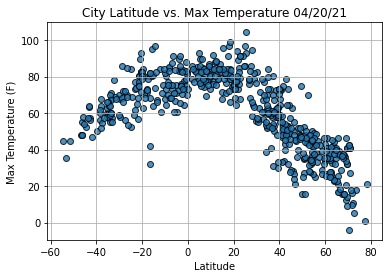

In [69]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

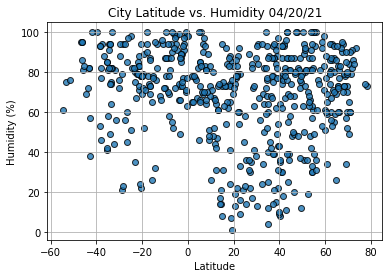

In [70]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

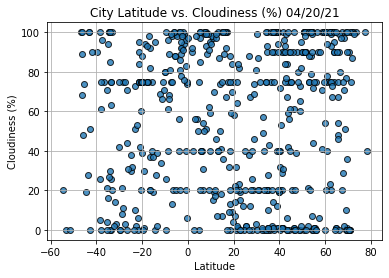

In [71]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

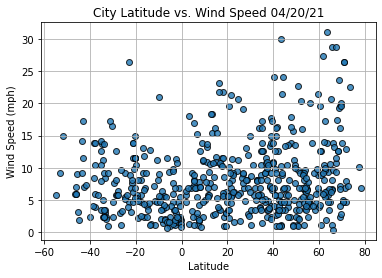

In [72]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [73]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [74]:
index13 = city_data_df.loc[13]
index13

City                     Bayangol
Country                        RU
Date          2021-04-21 05:57:32
Lat                       50.6977
Lng                       103.466
Max Temp                    35.64
Humidity                       50
Cloudiness                    100
Wind Speed                   9.73
Name: 13, dtype: object

In [75]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
542     True
543     True
544    False
545     True
546    False
Name: Lat, Length: 547, dtype: bool

In [76]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Saint-Denis,FR,2021-04-21 05:57:27,48.9167,2.3333,48.00,87,73,1.14
5,Solnechnyy,RU,2021-04-21 05:57:29,50.7214,136.6319,52.12,36,0,2.17
8,Shitanjing,CN,2021-04-21 05:57:30,39.2342,106.3439,63.25,43,100,2.35
9,Cabo San Lucas,MX,2021-04-21 05:57:31,22.8909,-109.9124,68.00,79,19,6.24
11,Severo-Kurilsk,RU,2021-04-21 05:57:31,50.6789,156.1250,34.86,94,100,22.68


In [77]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

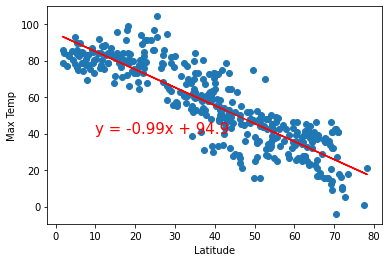

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

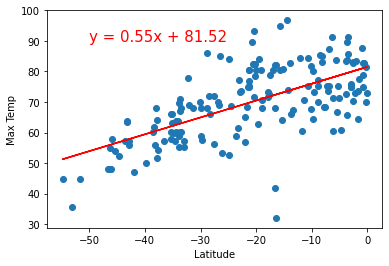

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

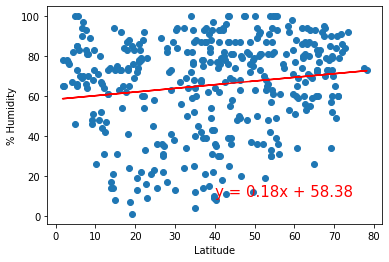

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

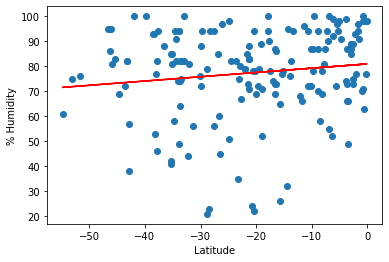

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

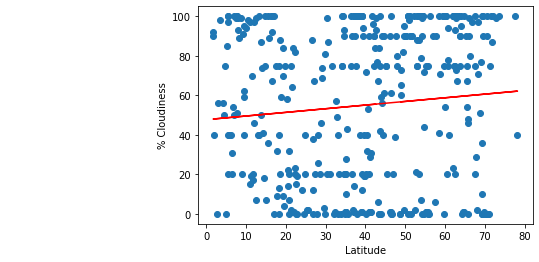

In [90]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

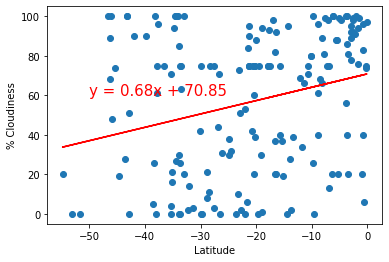

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

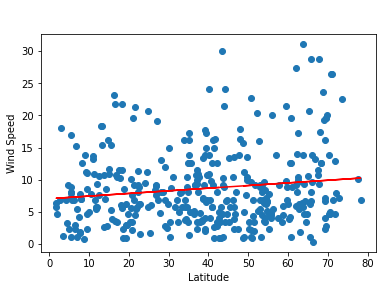

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

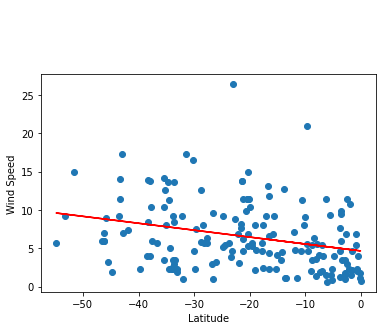

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))